# Setting

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Giảm chiều với PCA

## Hàm

In [21]:
def run_pca_analysis(X, y, name='default', n = 13):
    n_components = 21
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = explained_variance.cumsum()
    threshold_dim = (cumulative_variance >= 0.9).argmax() + 1

    # Biểu đồ phương sai tích lũy
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', linestyle='-', color='teal')
    plt.xticks(range(1, n_components + 1))
    plt.xlabel('Số chiều (số thành phần chính)')
    plt.ylabel('Tỷ lệ phương sai tích lũy')
    plt.title(f'{name} - Bảo tồn dữ liệu theo số chiều (PCA)')
    plt.axhline(y=0.9, color='red', linestyle='--', label='Ngưỡng 90%')
    plt.axvline(x=threshold_dim, color='blue', linestyle='--', label=f'{threshold_dim} chiều')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Trực quan PC1 và PC2
    plt.figure(figsize=(8, 6))
    sc = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'{name} - Trực quan PC1 và PC2')
    plt.colorbar(sc, label='satisfaction')
    plt.show()

    # Tỷ lệ giải thích
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=[f'PC{i+1}' for i in range(len(explained_variance))],
        y=explained_variance,
        color='skyblue'
    )
    plt.title(f'{name} - Tỷ lệ phương sai giải thích của các thành phần chính')
    plt.xlabel('Thành phần chính (Principal Component)')
    plt.ylabel('Tỷ lệ phương sai giải thích')
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Lấy dữ liệu PCA với n chiều đầu
    df_pca = pd.DataFrame(X_pca[:, :n], columns=[f'PC{i+1}' for i in range(n)])
    df_pca['satisfaction_satisfied'] = y.values

    # Heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        df_pca.corr(), 
        annot=True, 
        fmt=".3f",      
        cmap='magma',
        annot_kws={'size': 8}
    )
    plt.title(f'{name} - Ma trận tương quan giữa các PC và satisfaction')
    plt.show()

    return df_pca


In [47]:
def run_pca_test(X, y, n = 13):
    n_components = 21
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # Lấy dữ liệu PCA với n chiều đầu
    df_pca = pd.DataFrame(X_pca[:, :n], columns=[f'PC{i+1}' for i in range(n)])
    df_pca['satisfaction_satisfied'] = y.values

    return df_pca


## Tập 4:1

In [42]:
df = pd.read_csv(r'D:\9. ky2nam3\ML\Project_ML\data\original_data\train41.csv')

df_cleaned = df.drop(columns=['Index', 'id'], errors='ignore')
X_41 = df_cleaned.drop(columns=['satisfaction_satisfied'])
y_41 = df_cleaned['satisfaction_satisfied']

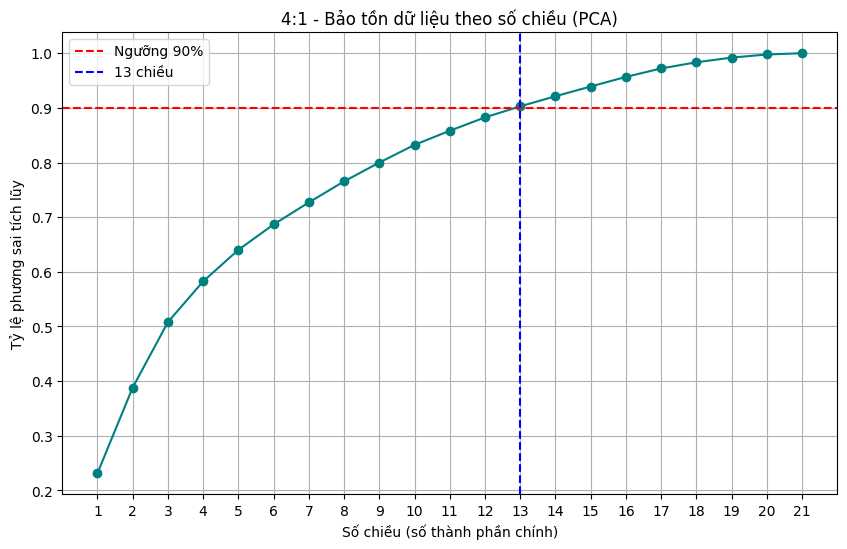

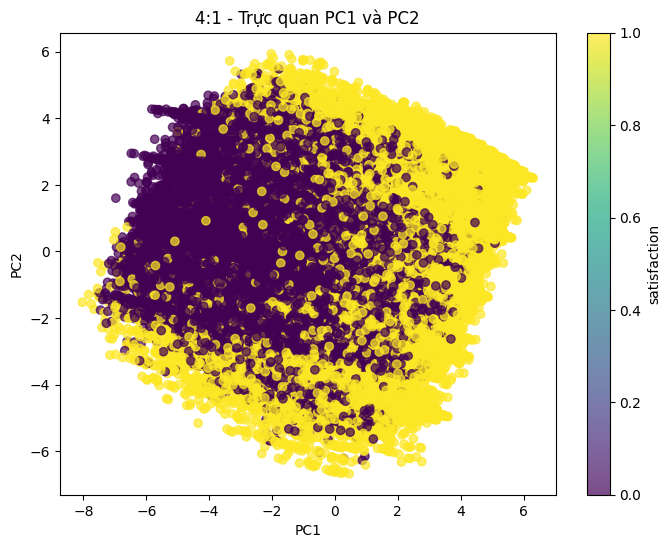

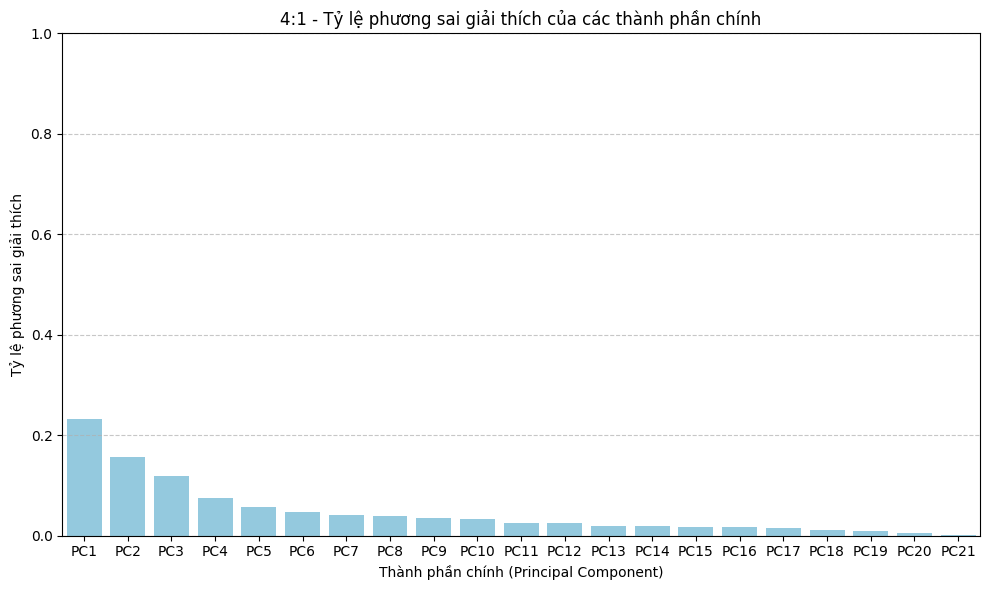

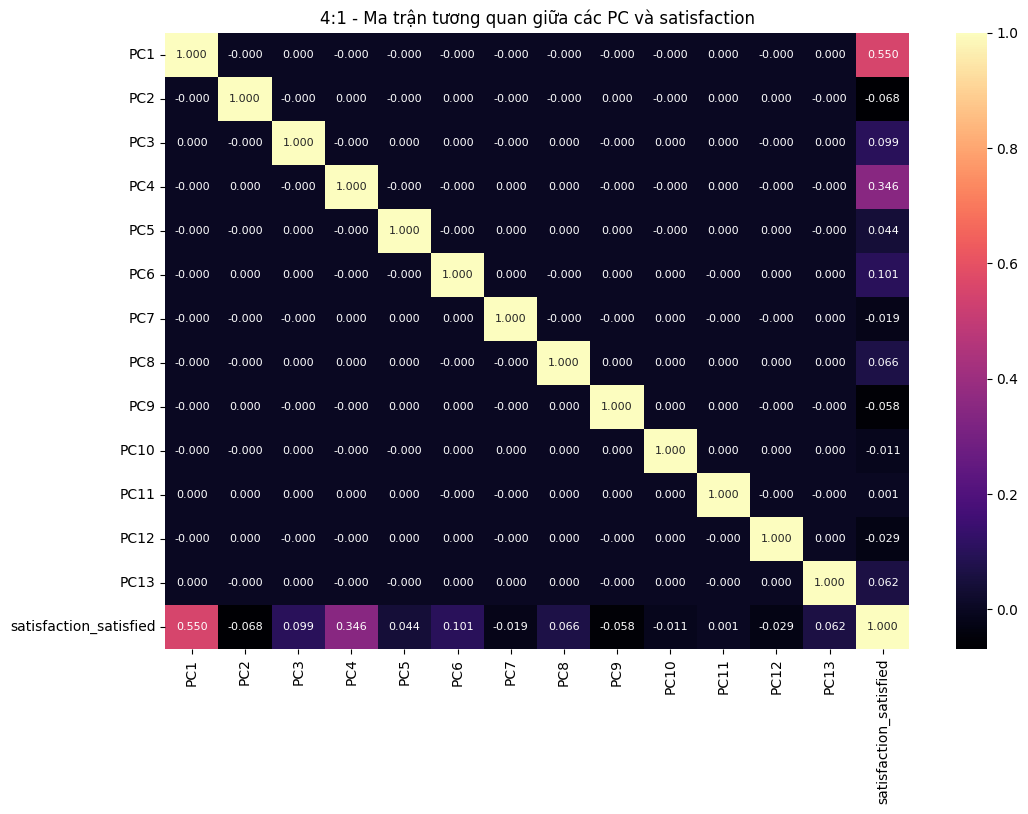

In [43]:
train_pca_41 = run_pca_analysis(X_41, y_41, name = "4:1", n = 13)

## Tập 6:4

In [36]:
df = pd.read_csv(r'D:\9. ky2nam3\ML\Project_ML\data\original_data\train64.csv')

df_cleaned = df.drop(columns=['Index', 'id'], errors='ignore')
X_64 = df_cleaned.drop(columns=['satisfaction_satisfied'])
y_64 = df_cleaned['satisfaction_satisfied']

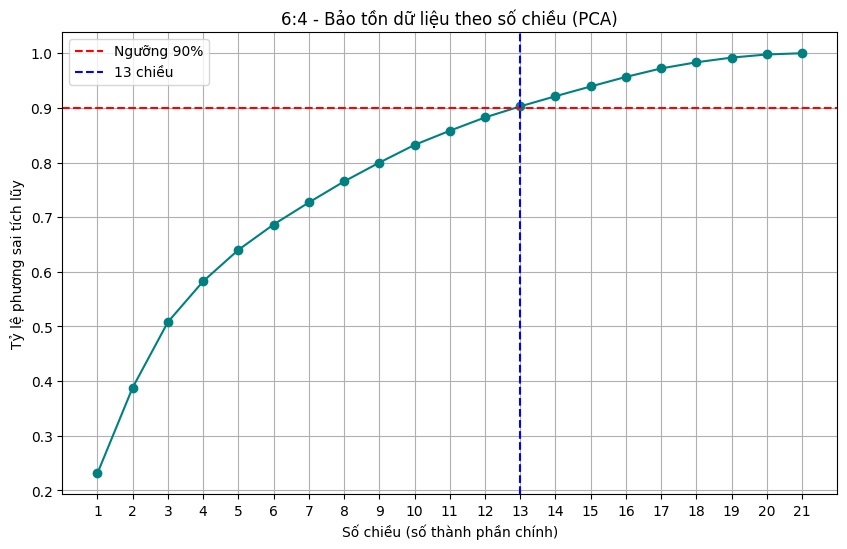

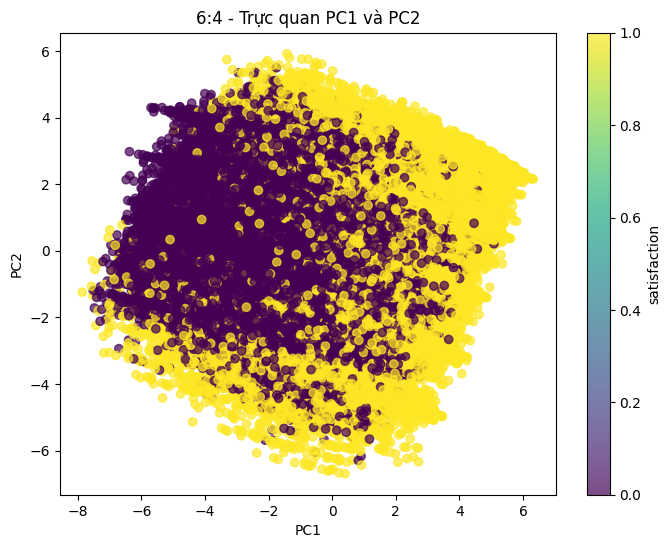

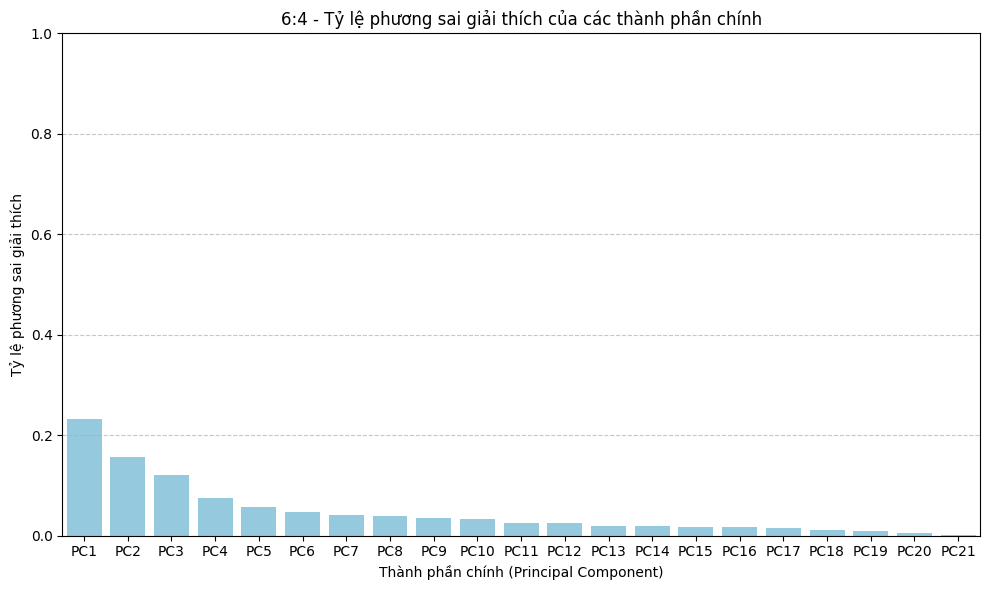

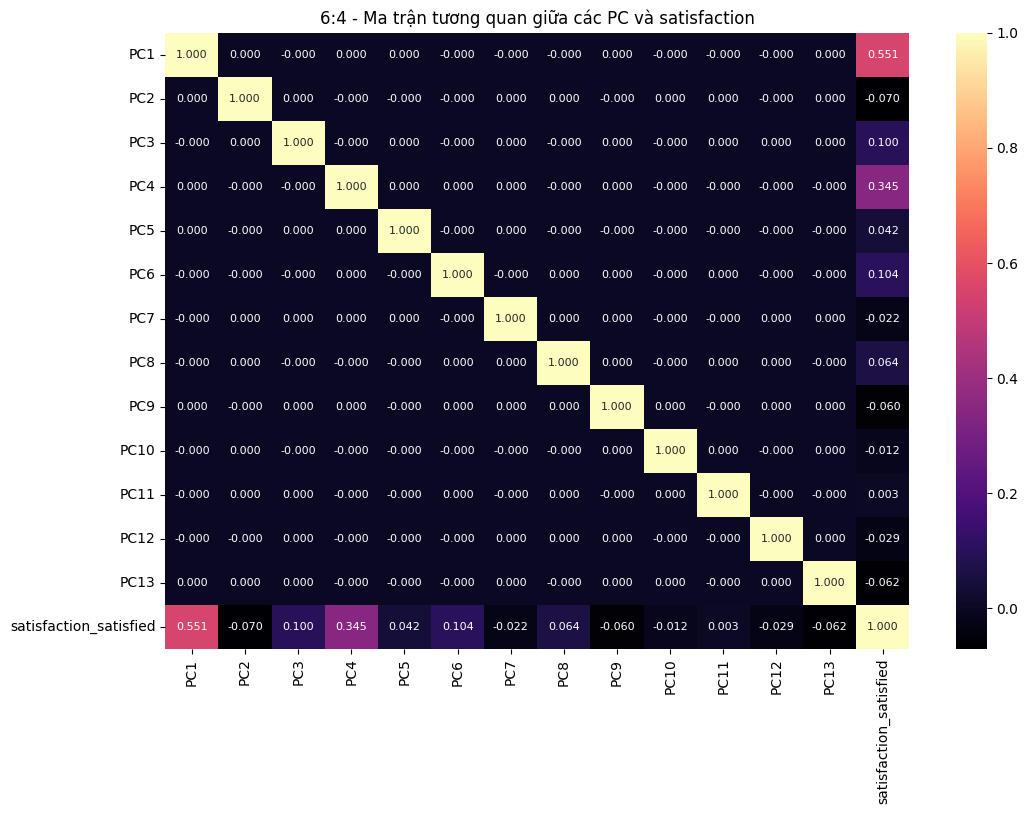

In [37]:
train_pca_64 = run_pca_analysis(X_64, y_64, name = "6:4", n = 13)

## Tập 7:3

In [38]:
df = pd.read_csv(r'D:\9. ky2nam3\ML\Project_ML\data\original_data\train73.csv')

df_cleaned = df.drop(columns=['Index', 'id'], errors='ignore')
X_73 = df_cleaned.drop(columns=['satisfaction_satisfied'])
y_73 = df_cleaned['satisfaction_satisfied']

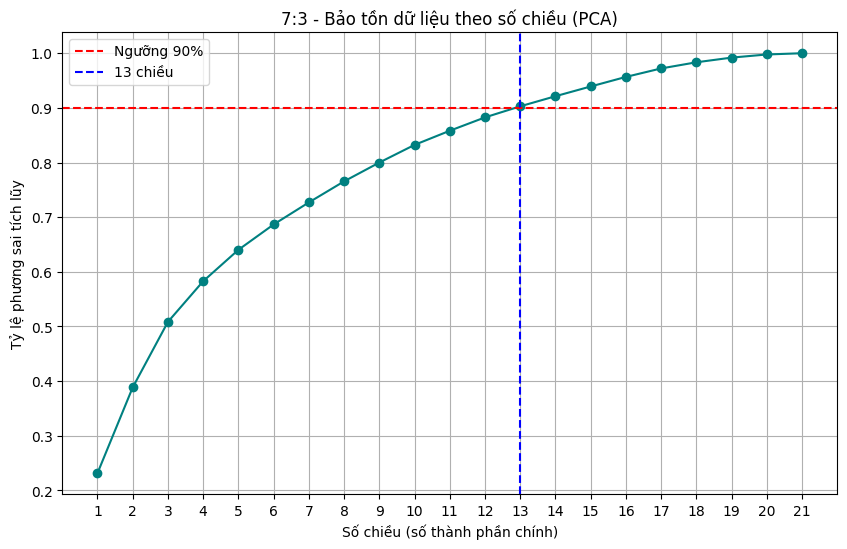

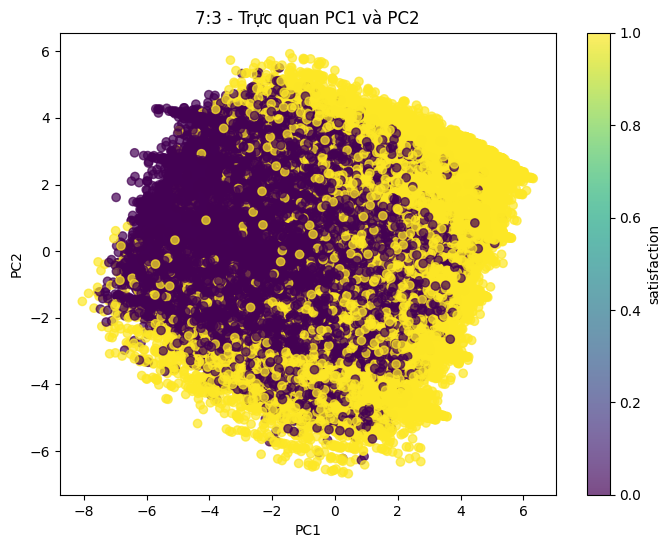

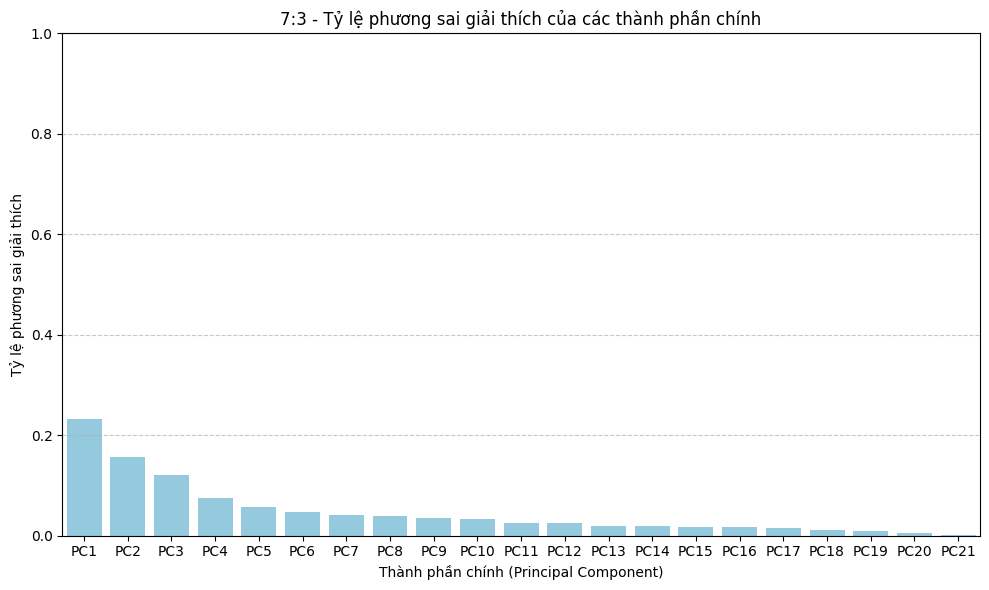

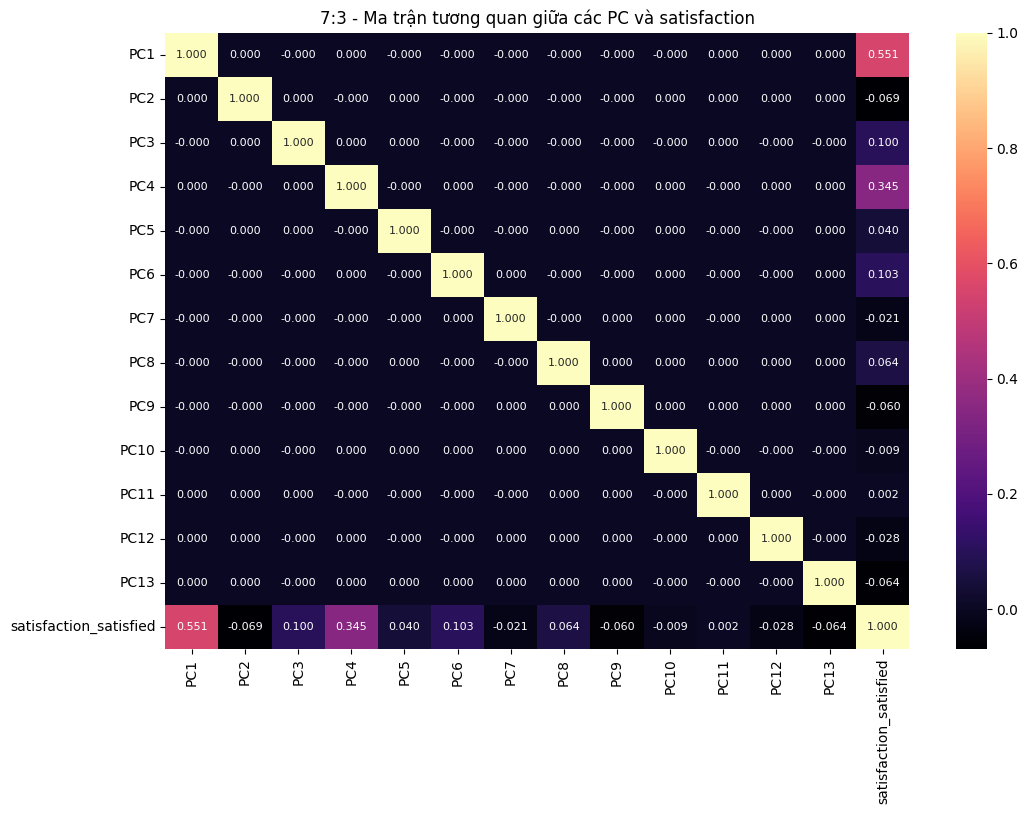

In [39]:
train_pca_73 = run_pca_analysis(X_73, y_73, name = "7:3", n = 13)

## Lưu dữ liệu mới

In [46]:
train_pca_41.to_csv(r'D:\9. ky2nam3\ML\Project_ML\data\PCA_data\train_pca_41.csv', index=False)
train_pca_64.to_csv(r'D:\9. ky2nam3\ML\Project_ML\data\PCA_data\train_pca_64.csv', index=False)
train_pca_73.to_csv(r'D:\9. ky2nam3\ML\Project_ML\data\PCA_data\train_pca_73.csv', index=False)

## Xử lý test

In [96]:
df_test = pd.read_csv(r'D:\9. ky2nam3\ML\Project_ML\data\original_data\test41.csv')

df_cleaned_41 = df_test.drop(columns=['Index', 'id'], errors='ignore')
X_test_41 = df_cleaned_41.drop(columns=['satisfaction_satisfied'])
y_test_41 = df_cleaned_41['satisfaction_satisfied']

test_pca_41 = run_pca_test(X_test_41, y_test_41, n = 13)

In [97]:
df_test = pd.read_csv(r'D:\9. ky2nam3\ML\Project_ML\data\original_data\test64.csv')

df_cleaned_64 = df_test.drop(columns=['Index', 'id'], errors='ignore')
X_test_64 = df_cleaned_64.drop(columns=['satisfaction_satisfied'])
y_test_64 = df_cleaned_64['satisfaction_satisfied']

test_pca_64 = run_pca_test(X_test_64, y_test_64, n = 13)

In [98]:
df_test = pd.read_csv(r'D:\9. ky2nam3\ML\Project_ML\data\original_data\test73.csv')

df_cleaned_73 = df_test.drop(columns=['Index', 'id'], errors='ignore')
X_test_73 = df_cleaned_73.drop(columns=['satisfaction_satisfied'])
y_test_73 = df_cleaned_73['satisfaction_satisfied']

test_pca_73 = run_pca_test(X_test_73, y_test_73, n = 13)

In [99]:
test_pca_41.to_csv(r'D:\9. ky2nam3\ML\Project_ML\data\PCA_data\test_pca_41.csv', index=False)
test_pca_64.to_csv(r'D:\9. ky2nam3\ML\Project_ML\data\PCA_data\test_pca_64.csv', index=False)
test_pca_73.to_csv(r'D:\9. ky2nam3\ML\Project_ML\data\PCA_data\test_pca_73.csv', index=False)

# Giảm chiều với LDA

## Hàm

In [68]:
def run_lda_train(X, y, name='default'):
    lda = LinearDiscriminantAnalysis(n_components=1)
    X_lda = lda.fit_transform(X, y)

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.scatter(
        X_lda[:, 0], 
        [0] * len(X_lda), 
        c=y, 
        cmap='viridis', 
        alpha=0.7, 
        s=20, 
        zorder=1
    )
    sns.kdeplot(
        X_lda[y == 0, 0], 
        fill=True, 
        alpha=0.2, 
        color='violet',
        label='Neutral or dissatisfied (0)', 
        ax=ax, 
        linewidth=2,
        zorder=2
    )
    sns.kdeplot(
        X_lda[y == 1, 0], 
        fill=True, 
        alpha=0.2, 
        color='yellow',
        label='Satisfied (1)', 
        ax=ax, 
        linewidth=2,
        zorder=2
    )    

    ax.set_xlabel('LD1')
    ax.set_ylabel('Density / 0 (scatter)')
    ax.set_title(f'{name} - LDA Projection with KDE')
    ax.legend()
    ax.grid(True)

    plt.show()

    mean_class_0 = np.mean(X_lda[y == 0])
    mean_class_1 = np.mean(X_lda[y == 1])
    separation = abs(mean_class_0 - mean_class_1)

    print(f"Khoảng cách trung bình giữa hai lớp trong không gian LD1: {separation:.4f}")

    df_lda = pd.DataFrame(X_lda, columns=['LD1'])
    df_lda['satisfaction_satisfied'] = y.values

    return df_lda

In [90]:
def run_lda_test(X, y):
    lda = LinearDiscriminantAnalysis(n_components=1)
    X_lda = lda.fit_transform(X, y)

    df_lda = pd.DataFrame(X_lda, columns=['LD1'])
    df_lda['satisfaction_satisfied'] = y.values

    return df_lda

## tập 4:1

In [56]:
df = pd.read_csv(r'D:\9. ky2nam3\ML\Project_ML\data\original_data\train41.csv')

df_cleaned = df.drop(columns=['Index', 'id'], errors='ignore')
X_41 = df_cleaned.drop(columns=['satisfaction_satisfied'])
y_41 = df_cleaned['satisfaction_satisfied']

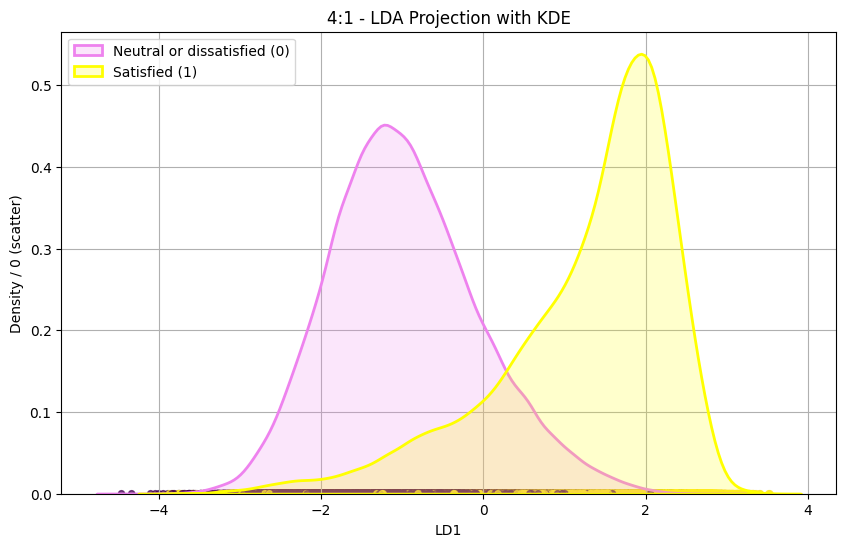

Khoảng cách trung bình giữa hai lớp trong không gian LD1: 2.2351


In [58]:
train_lda_41 = run_lda_train(X_41, y_41, name = '4:1')

## Tập 64

In [61]:
df = pd.read_csv(r'D:\9. ky2nam3\ML\Project_ML\data\original_data\train64.csv')

df_cleaned = df.drop(columns=['Index', 'id'], errors='ignore')
X_64 = df_cleaned.drop(columns=['satisfaction_satisfied'])
y_64 = df_cleaned['satisfaction_satisfied']

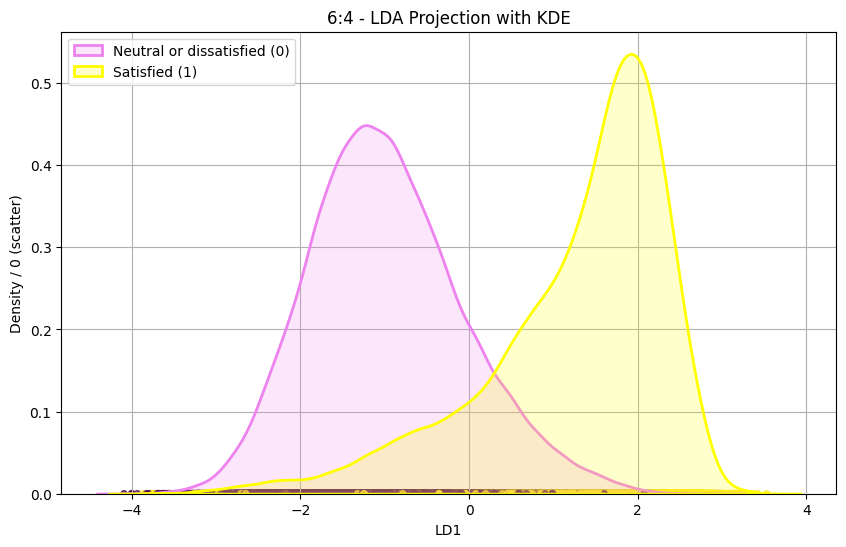

Khoảng cách trung bình giữa hai lớp trong không gian LD1: 2.2427


In [62]:
train_lda_64 = run_lda_train(X_64, y_64, name = '6:4')

## tập 7:3

In [64]:
df = pd.read_csv(r'D:\9. ky2nam3\ML\Project_ML\data\original_data\train73.csv')

df_cleaned = df.drop(columns=['Index', 'id'], errors='ignore')
X_73 = df_cleaned.drop(columns=['satisfaction_satisfied'])
y_73 = df_cleaned['satisfaction_satisfied']

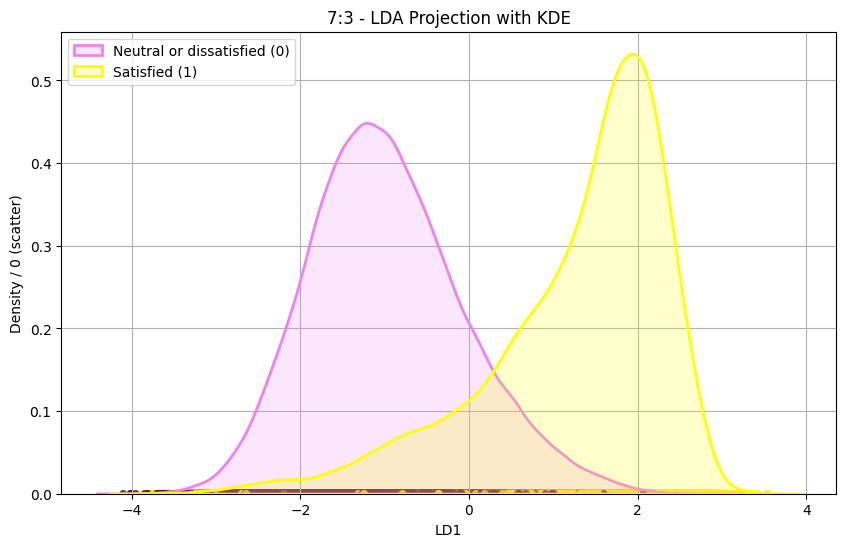

Khoảng cách trung bình giữa hai lớp trong không gian LD1: 2.2401


In [65]:
train_lda_73 = run_lda_train(X_73, y_73, name = '7:3')

## Dữ liệu mới

In [66]:
train_lda_41.to_csv(r'D:\9. ky2nam3\ML\Project_ML\data\LDA_data\train_lda_41.csv', index=False)
train_lda_64.to_csv(r'D:\9. ky2nam3\ML\Project_ML\data\LDA_data\train_lda_64.csv', index=False)
train_lda_73.to_csv(r'D:\9. ky2nam3\ML\Project_ML\data\LDA_data\train_lda_73.csv', index=False)

## Xử lý test

In [100]:
df_test = pd.read_csv(r'D:\9. ky2nam3\ML\Project_ML\data\original_data\test41.csv')

df_cleaned_41 = df_test.drop(columns=['Index', 'id'], errors='ignore')
X_test_41 = df_cleaned_41.drop(columns=['satisfaction_satisfied'])
y_test_41 = df_cleaned_41['satisfaction_satisfied']

test_lda_41 = run_lda_test(X_test_41, y_test_41)

In [102]:
df_test = pd.read_csv(r'D:\9. ky2nam3\ML\Project_ML\data\original_data\test64.csv')

df_cleaned_64 = df_test.drop(columns=['Index', 'id'], errors='ignore')
X_test_64 = df_cleaned_64.drop(columns=['satisfaction_satisfied'])
y_test_64 = df_cleaned_64['satisfaction_satisfied']

test_lda_64 = run_lda_test(X_test_64, y_test_64)

In [104]:
df_test = pd.read_csv(r'D:\9. ky2nam3\ML\Project_ML\data\original_data\test73.csv')

df_cleaned_73 = df_test.drop(columns=['Index', 'id'], errors='ignore')
X_test_73 = df_cleaned_73.drop(columns=['satisfaction_satisfied'])
y_test_73 = df_cleaned_73['satisfaction_satisfied']

test_lda_73 = run_lda_test(X_test_73, y_test_73)

In [106]:
test_lda_41.to_csv(r'D:\9. ky2nam3\ML\Project_ML\data\LDA_data\test_lda_41.csv', index=False)
test_lda_64.to_csv(r'D:\9. ky2nam3\ML\Project_ML\data\LDA_data\test_lda_64.csv', index=False)
test_lda_73.to_csv(r'D:\9. ky2nam3\ML\Project_ML\data\LDA_data\test_lda_73.csv', index=False)

# Kiểm tra

In [107]:
import pandas as pd

# Đường dẫn tới các thư mục
pca_dir = r"D:\9. ky2nam3\ML\Project_ML\data\PCA_data"
lda_dir = r"D:\9. ky2nam3\ML\Project_ML\data\LDA_data"

# Đọc các file PCA
train_pca_41 = pd.read_csv(f"{pca_dir}\\train_pca_41.csv")
test_pca_41  = pd.read_csv(f"{pca_dir}\\test_pca_41.csv")
train_pca_64 = pd.read_csv(f"{pca_dir}\\train_pca_64.csv")
test_pca_64  = pd.read_csv(f"{pca_dir}\\test_pca_64.csv")
train_pca_73 = pd.read_csv(f"{pca_dir}\\train_pca_73.csv")
test_pca_73  = pd.read_csv(f"{pca_dir}\\test_pca_73.csv")

# Đọc các file LDA
train_lda_41 = pd.read_csv(f"{lda_dir}\\train_lda_41.csv")
test_lda_41  = pd.read_csv(f"{lda_dir}\\test_lda_41.csv")
train_lda_64 = pd.read_csv(f"{lda_dir}\\train_lda_64.csv")
test_lda_64  = pd.read_csv(f"{lda_dir}\\test_lda_64.csv")
train_lda_73 = pd.read_csv(f"{lda_dir}\\train_lda_73.csv")
test_lda_73  = pd.read_csv(f"{lda_dir}\\test_lda_73.csv")

# In kích thước của từng DataFrame
print("train_pca_41:", train_pca_41.shape)
print("test_pca_41:",  test_pca_41.shape)
print("train_pca_64:", train_pca_64.shape)
print("test_pca_64:",  test_pca_64.shape)
print("train_pca_73:", train_pca_73.shape)
print("test_pca_73:",  test_pca_73.shape)

print("train_lda_41:", train_lda_41.shape)
print("test_lda_41:",  test_lda_41.shape)
print("train_lda_64:", train_lda_64.shape)
print("test_lda_64:",  test_lda_64.shape)
print("train_lda_73:", train_lda_73.shape)
print("test_lda_73:",  test_lda_73.shape)


train_pca_41: (103589, 14)
test_pca_41: (25898, 14)
train_pca_64: (77692, 14)
test_pca_64: (51795, 14)
train_pca_73: (90640, 14)
test_pca_73: (38847, 14)
train_lda_41: (103589, 2)
test_lda_41: (25898, 2)
train_lda_64: (77692, 2)
test_lda_64: (51795, 2)
train_lda_73: (90640, 2)
test_lda_73: (38847, 2)
